In [ ]:

from tensorflow import keras
from keras.datasets import mnist

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape 


(60000, 28, 28)

In [10]:
y_train.shape

(60000,)

<function matplotlib.pyplot.show(close=None, block=None)>

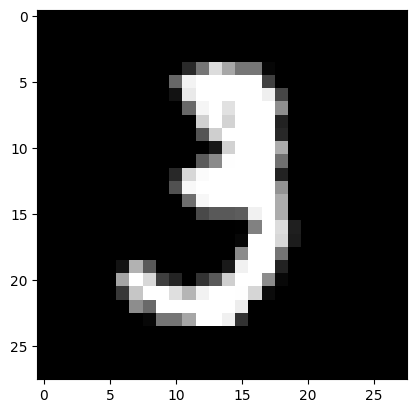

In [11]:
import matplotlib.pyplot as plt

plt.imshow(x_train[10], cmap='gray')
plt.show

# preprocessing

In [13]:
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32')/255
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32')/255

x_train.shape

(60000, 28, 28, 1)

# model definition

In [14]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape= (28,28,1) ))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))



/Users/taktakro/Desktop/MLProjects/venv3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
import tensorflow as tf
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,770,634 (10.57 MB)

 Trainable params: 2,770,634 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test) )


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.4006 - loss: 1.9513 - val_accuracy: 0.7289 - val_loss: 47.2638
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8582 - loss: 0.5225 - val_accuracy: 0.7775 - val_loss: 55.4300
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8895 - loss: 0.3807 - val_accuracy: 0.8281 - val_loss: 48.5541
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9022 - loss: 0.3343 - val_accuracy: 0.8569 - val_loss: 44.0183
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9101 - loss: 0.3030 - val_accuracy: 0.8869 - val_loss: 35.3685
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9191 - loss: 0.2785 - val_accuracy: 0.8991 - val_loss: 33.0296
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9219 - loss: 0.2628 - val_accuracy: 0.9091 - val_loss: 30.1383
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9276 - loss: 0.2470 - v

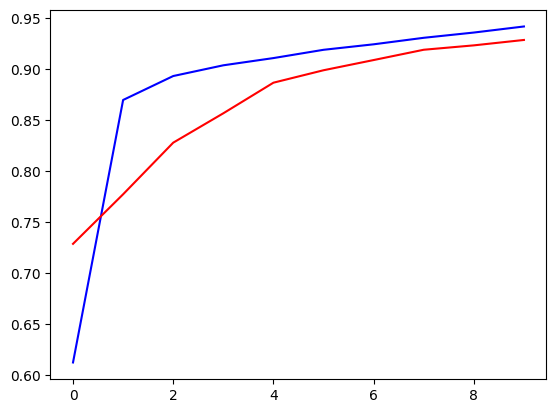

In [18]:
plt.plot(hist.history['accuracy'], color='blue')
plt.plot(hist.history['val_accuracy'], color='red')